In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
#using death.json file
def lives_vs_daysSurvived(fileName, team):
  if not isinstance(team,str):
    print("Error: Team variable should be a string!")

  dataFrame = pd.read_json(fileName, lines = True)
  teamData = dataFrame[dataFrame["agent_type"].str.contains(team)] #extract data for a certain team
  ages = teamData["ageUponDeath"].values #convert into numpy
  #ages = teamData["Age"].values #convert into numpy
  deaths = np.arange(len(ages)) + 1
  return deaths, ages 

#using .csv file
def cumulativeRewards(fileName):
  data = pd.read_csv(fileName).to_numpy()
  day = np.arange(data.size) + 1
  return day, data

#using death.json file
def days_vs_deathPerDay(fileName, simulation_days):
  dataFrame = pd.read_json(fileName, lines = True)
  day = np.arange(simulation_days) + 1
  deathPerDay = np.zeros(simulation_days)

  value_count = dataFrame["ageUponDeath"].value_counts()
  for n in range(simulation_days):
    if n+1 in value_count:
      deathPerDay[n] = value_count[n+1]
  
  return day, deathPerDay

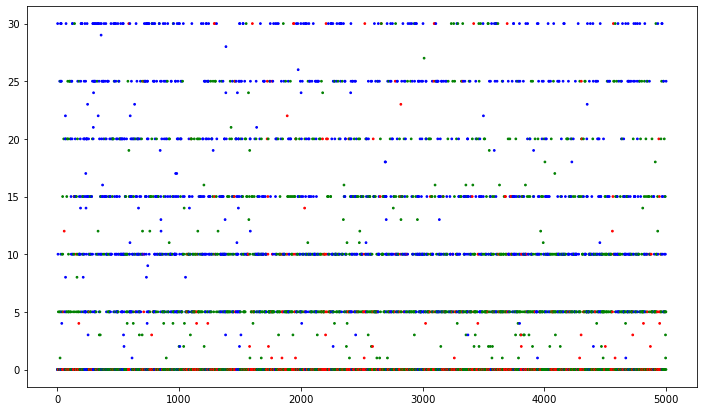

In [43]:
import csv

with open('log_plot/2022-01-09-18-54-51_5000/foodtaken_vs_hp_cc55824a-3d6a-46ec-b618-f8d85d693054.csv', newline='') as f:
    reader = csv.reader(f)
    foodAndHp = list(reader)

days = list(range(1, len(foodAndHp)+1))
foodEaten = [float(x[0]) for x in foodAndHp]
Hp = [float(x[1]) for x in foodAndHp]

def sortHp(n):
    if n < 34:
        return 0
    elif n < 67:
        return 1
    else:
        return 2
#HpSorted = list(map(sortHp,Hp))

#plt.scatter(days, foodEaten,s=10,c=HpSorted,cmap='Greens')
#plt.scatter(days, foodEaten,s=10,c=HpSorted,cmap='PuBuGn')
"""
colors=["#0000FF", "#00FF00", "#FF0066"]
for i in range(len(days)):
    plt.scatter(days[i], foodEaten[i], color=colors[HpSorted[i]])
"""
def sortHp(n):
    if n < 34:
        return "red"
    elif n < 67:
        return "green"
    else:
        return "blue"
sequence_of_colors = list(map(sortHp,Hp))
plt.figure(figsize=(12, 7))
plt.scatter(days, foodEaten,s=3,c=sequence_of_colors)

plt.show()